# PROJECT 2

## Table of contents
<a id='table_of_contents'></a>

0. [Import libraries](#import_libraries)
1. [Import data](#import_data)
2. [Data exploration](#data_exploration)
3. [Data cleaning](#data_cleaning)
4. [Benchmark model](#Benchmark_model)
    4.1. [Train-test split](#Train-test_split)
    4.2. [Fit a model to the data](#Fit_a_model_to_the_data)
    4.3. [Model evaluation](#Model_evaluation)
5. [Feature engineering](#Feature_engineering)
6. [Model training](#Model_training)
    7.1. [Decision Tree](#Decision_tree)
    7.2. [KNN](#KNN)
    7.3. [Comparing algorithm performances](#Comparing_algorithm_performances)
7. [Tuning](#Tuning)


### 0.Import libraries  <a id='import_libraries'></a>



[Back_to_top](#table_of_contents)

In [393]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import scipy
import sklearn

### 1.Import Data <a id='import_data'></a>
[Back_to_top](#table_of_contents)

In [394]:
hcc_data = pd.read_csv("hcc_dataset.csv")

In [395]:
pd.set_option('display.max_columns',None)

In [396]:
print(hcc_data.shape)
hcc_data.head()

(165, 50)


Gender Symptoms Alcohol HBsAg HBeAg HBcAb HCVAb Cirrhosis Endemic Smoking  \
0    Male       No     Yes    No    No    No    No       Yes      No     Yes   
1  Female        ?      No    No    No    No   Yes       Yes       ?       ?   
2    Male       No     Yes   Yes    No   Yes    No       Yes      No     Yes   
3    Male      Yes     Yes    No    No    No    No       Yes      No     Yes   
4    Male      Yes     Yes   Yes    No   Yes    No       Yes      No     Yes   

  Diabetes Obesity Hemochro  AHT  CRI HIV NASH Varices Spleno  PHT PVT  \
0      Yes       ?      Yes   No   No  No   No     Yes     No   No  No   
1      Yes      No       No  Yes   No  No   No     Yes     No   No  No   
2       No      No       No  Yes  Yes  No   No      No     No  Yes  No   
3      Yes      No       No  Yes   No  No   No      No     No   No  No   
4       No      No       No  Yes  Yes  No   No      No     No   No  No   

  Metastasis Hallmark  Age Grams_day Packs_year          PS Encephalopathy  \
0         No      Yes   67       137         15      Active            NaN   
1         No      Yes   62         0          ?      Active            NaN   
2        Yes      Yes   78        50         50  Ambulatory            NaN   
3        Yes      Yes   77        40         30      Active            NaN   
4         No      Yes   76       100         30      Active            NaN   

  Ascites   INR   AFP Hemoglobin    MCV Leucocytes Platelets  Albumin  \
0     NaN  1.53    95       13.7  106.6        4.9        99      3.4   
1     NaN     ?     ?          ?      ?          ?         ?        ?   
2    Mild  0.96   5.8        8.9   79.8        8.4       472      3.3   
3     NaN  0.95  2440       13.4   97.1          9       279      3.7   
4     NaN  0.94    49       14.3   95.1        6.4       199      4.1   

  Total_Bil  ALT  AST  GGT  ALP   TP Creatinine Nodules Major_Dim Dir_Bil  \
0       2.1   34   41  183  150  7.1        0.7       1       3.5     0.5   
1         ?    ?    ?    ?    ?    ?          ?       1       1.8       ?   
2       0.4   58   68  202  109    7        2.1       5        13     0.1   
3       0.4   16   64   94  174  8.1       1.11       2      15.7     0.2   
4       0.7  147  306  173  109  6.9        1.8       1         9       ?   

  Iron Sat Ferritin  Class  
0    ?   ?        ?  Lives  
1    ?   ?        ?  Lives  
2   28   6       16  Lives  
3    ?   ?        ?   Dies  
4   59  15       22  Lives

### 2.Data exploration  <a id='data_exploration'></a>

[Back_to_top](#table_of_contents)

In [397]:
hcc_data.columns

Index(['Gender', 'Symptoms', 'Alcohol', 'HBsAg', 'HBeAg', 'HBcAb', 'HCVAb',
       'Cirrhosis', 'Endemic', 'Smoking', 'Diabetes', 'Obesity', 'Hemochro',
       'AHT', 'CRI', 'HIV', 'NASH', 'Varices', 'Spleno', 'PHT', 'PVT',
       'Metastasis', 'Hallmark', 'Age', 'Grams_day', 'Packs_year', 'PS',
       'Encephalopathy', 'Ascites', 'INR', 'AFP', 'Hemoglobin', 'MCV',
       'Leucocytes', 'Platelets', ' Albumin', 'Total_Bil', 'ALT', 'AST', 'GGT',
       'ALP', 'TP', 'Creatinine', 'Nodules', 'Major_Dim', 'Dir_Bil', 'Iron',
       'Sat', 'Ferritin', 'Class'],
      dtype='object')

In [398]:
hcc_data.dtypes

Gender            object
Symptoms          object
Alcohol           object
HBsAg             object
HBeAg             object
HBcAb             object
HCVAb             object
Cirrhosis         object
Endemic           object
Smoking           object
Diabetes          object
Obesity           object
Hemochro          object
AHT               object
CRI               object
HIV               object
NASH              object
Varices           object
Spleno            object
PHT               object
PVT               object
Metastasis        object
Hallmark          object
Age                int64
Grams_day         object
Packs_year        object
PS                object
Encephalopathy    object
Ascites           object
INR               object
AFP               object
Hemoglobin        object
MCV               object
Leucocytes        object
Platelets         object
 Albumin          object
Total_Bil         object
ALT               object
AST               object
GGT               object


In [399]:
numerical_columns = ['Age','Grams_day', 'Packs_year','INR', 'AFP', 'Hemoglobin', 'MCV',
       'Leucocytes', 'Platelets', ' Albumin', 'Total_Bil', 'ALT', 'AST', 'GGT',
       'ALP', 'TP', 'Creatinine', 'Nodules', 'Major_Dim', 'Dir_Bil', 'Iron',
       'Sat', 'Ferritin']
for col in numerical_columns:
    # Verificar se a coluna é de tipo object, indicando possível presença de strings
    if hcc_data[col].dtype == 'object' :
        hcc_data[col]=pd.to_numeric(hcc_data[col].str.replace(' ', ''), errors='coerce')
    else:
        # Se não for object, converte diretamente
        hcc_data[col]=pd.to_numeric(hcc_data[col], errors='coerce')

In [400]:
hcc_data.dtypes

Gender             object
Symptoms           object
Alcohol            object
HBsAg              object
HBeAg              object
HBcAb              object
HCVAb              object
Cirrhosis          object
Endemic            object
Smoking            object
Diabetes           object
Obesity            object
Hemochro           object
AHT                object
CRI                object
HIV                object
NASH               object
Varices            object
Spleno             object
PHT                object
PVT                object
Metastasis         object
Hallmark           object
Age                 int64
Grams_day         float64
Packs_year        float64
PS                 object
Encephalopathy     object
Ascites            object
INR               float64
AFP               float64
Hemoglobin        float64
MCV               float64
Leucocytes        float64
Platelets         float64
 Albumin          float64
Total_Bil         float64
ALT               float64
AST         

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Grams_day'}>,
        <Axes: title={'center': 'Packs_year'}>,
        <Axes: title={'center': 'INR'}>, <Axes: title={'center': 'AFP'}>],
       [<Axes: title={'center': 'Hemoglobin'}>,
        <Axes: title={'center': 'MCV'}>,
        <Axes: title={'center': 'Leucocytes'}>,
        <Axes: title={'center': 'Platelets'}>,
        <Axes: title={'center': ' Albumin'}>],
       [<Axes: title={'center': 'Total_Bil'}>,
        <Axes: title={'center': 'ALT'}>, <Axes: title={'center': 'AST'}>,
        <Axes: title={'center': 'GGT'}>, <Axes: title={'center': 'ALP'}>],
       [<Axes: title={'center': 'TP'}>,
        <Axes: title={'center': 'Creatinine'}>,
        <Axes: title={'center': 'Nodules'}>,
        <Axes: title={'center': 'Major_Dim'}>,
        <Axes: title={'center': 'Dir_Bil'}>],
       [<Axes: title={'center': 'Iron'}>,
        <Axes: title={'center': 'Sat'}>,
        <Axes: title={'center': 'Ferritin'}>, <Axes: 

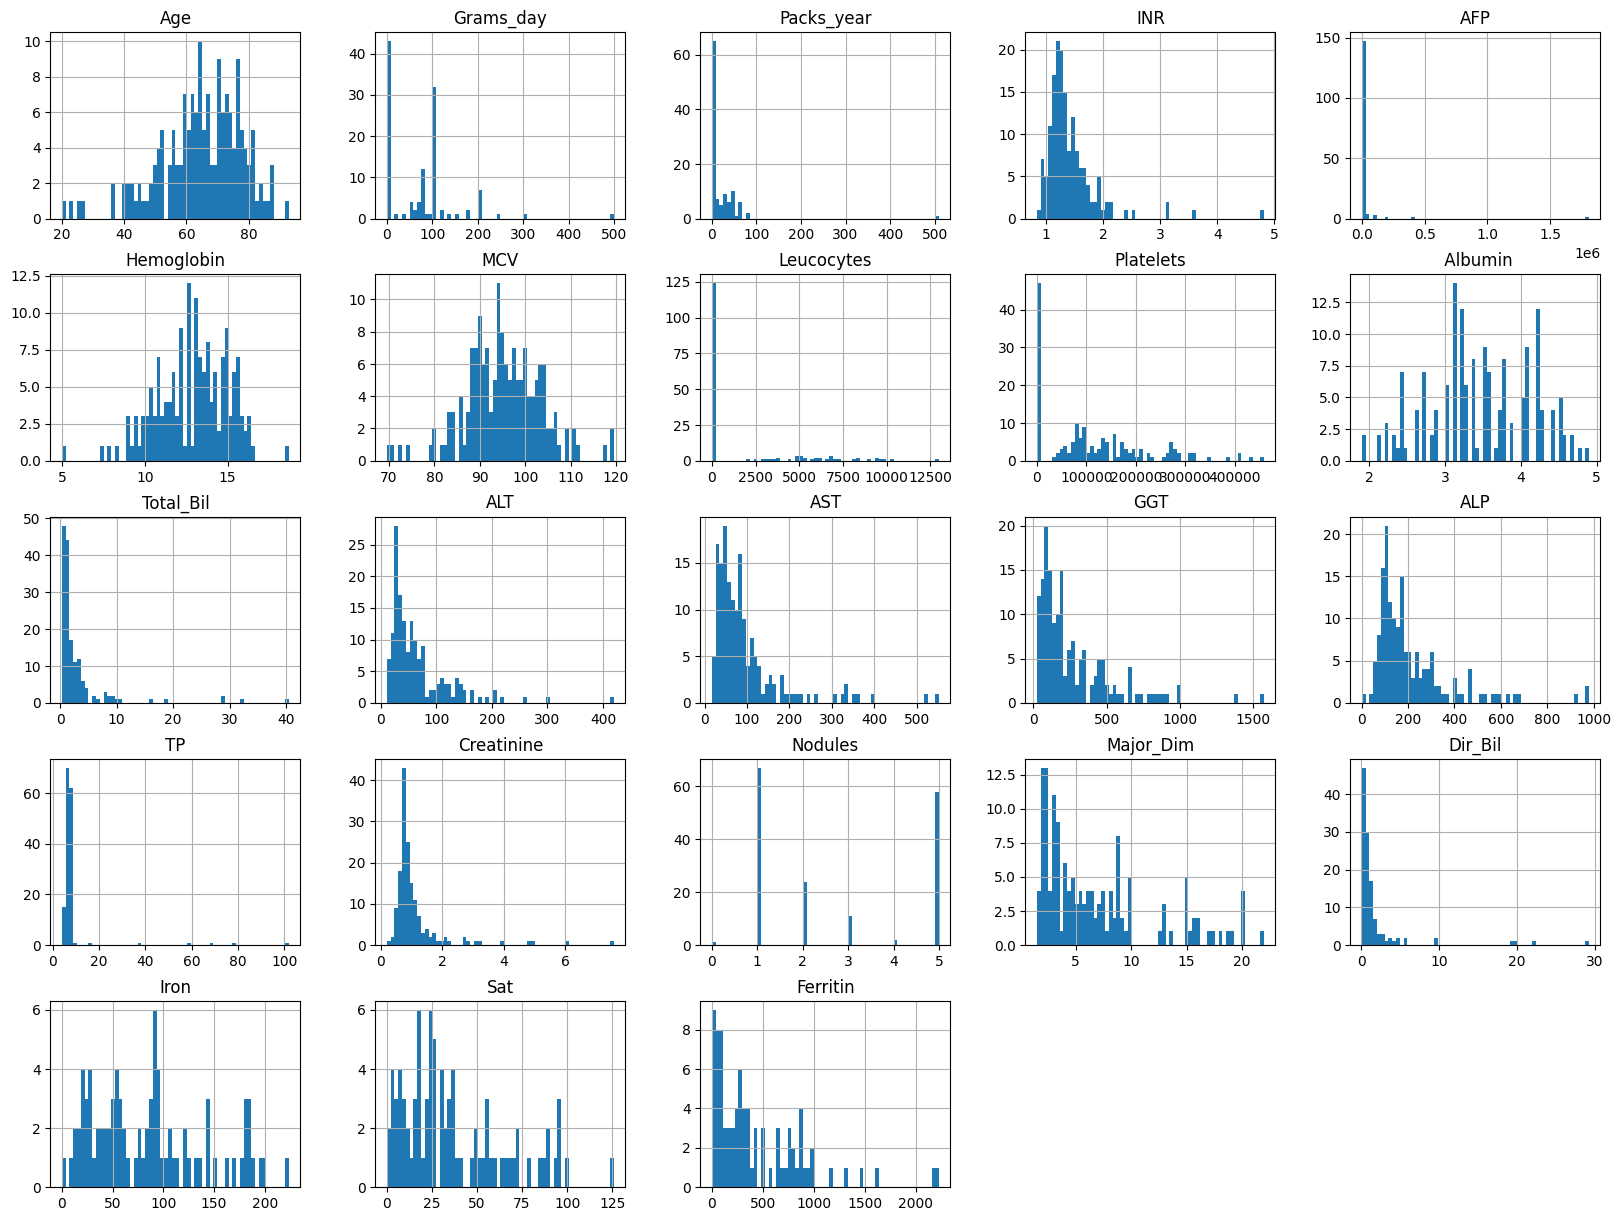

In [401]:
hcc_data.hist(figsize=(20,15),bins=60)

<Axes: xlabel='index', ylabel='Grams_day'>

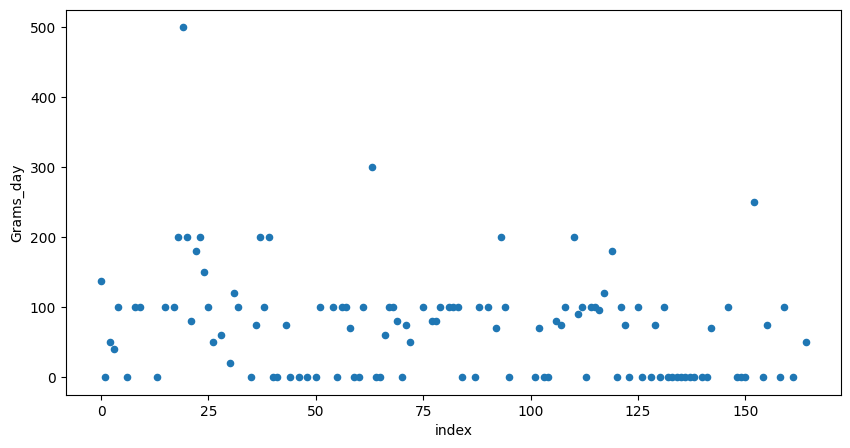

In [402]:
hcc_data.reset_index().plot(kind='scatter',y='Grams_day',x='index',figsize=(10,5))

<Axes: xlabel='Grams_day'>

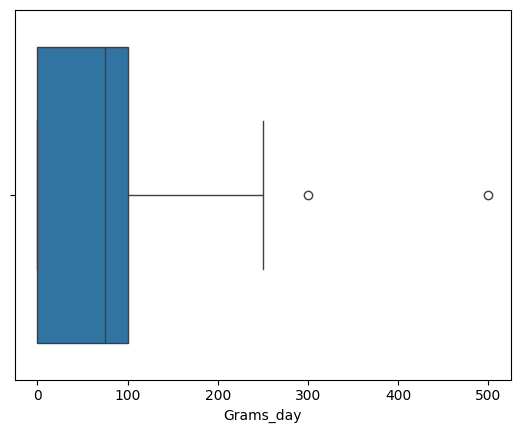

In [403]:
sns.boxplot(x=hcc_data['Grams_day'])

<Axes: xlabel='index', ylabel='Packs_year'>

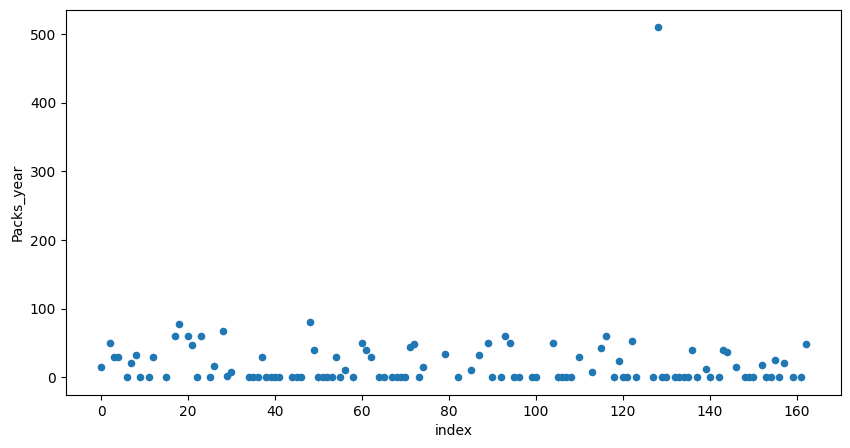

In [404]:
hcc_data.reset_index().plot(kind='scatter',y='Packs_year',x='index',figsize=(10,5))

In [405]:
hcc_data[hcc_data['Packs_year']>100].shape

(1, 50)

<Axes: xlabel='index', ylabel='INR'>

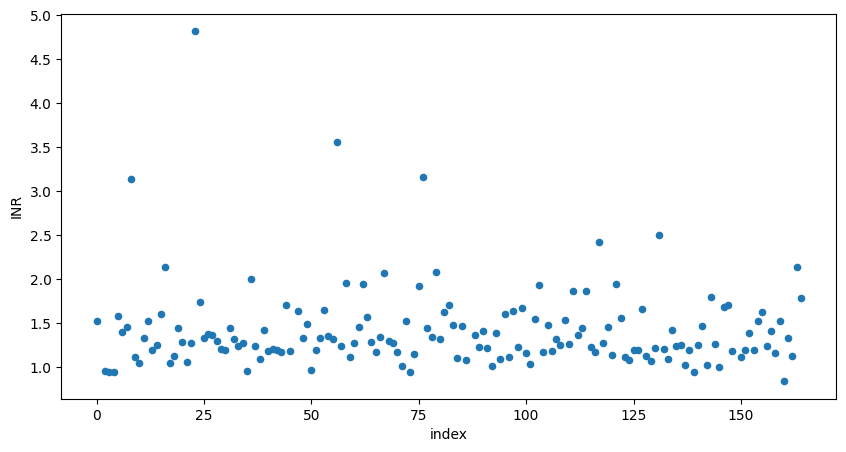

In [406]:
hcc_data.reset_index().plot(kind='scatter',y='INR',x='index',figsize=(10,5))

In [407]:
hcc_data[hcc_data['Packs_year']>2.5].shape

(49, 50)

<Axes: xlabel='index', ylabel='AFP'>

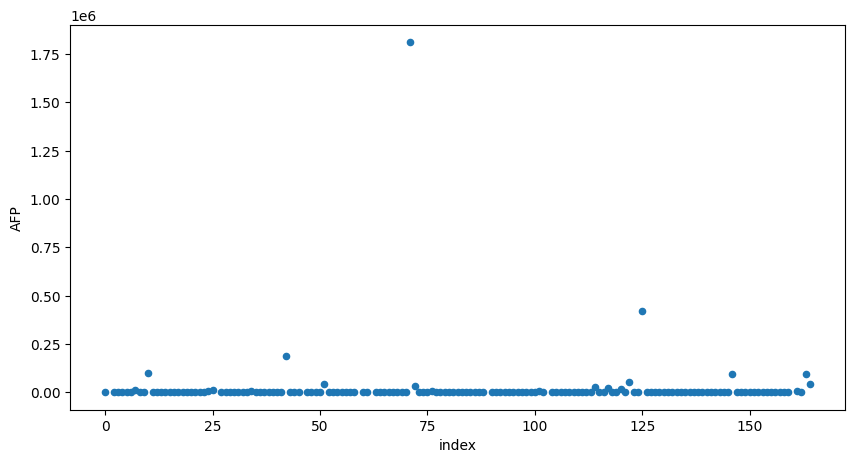

In [408]:
hcc_data.reset_index().plot(kind='scatter',y='AFP',x='index',figsize=(10,5))

In [409]:
hcc_data[hcc_data['Packs_year']>500].shape

(1, 50)

<Axes: xlabel='index', ylabel='Hemoglobin'>

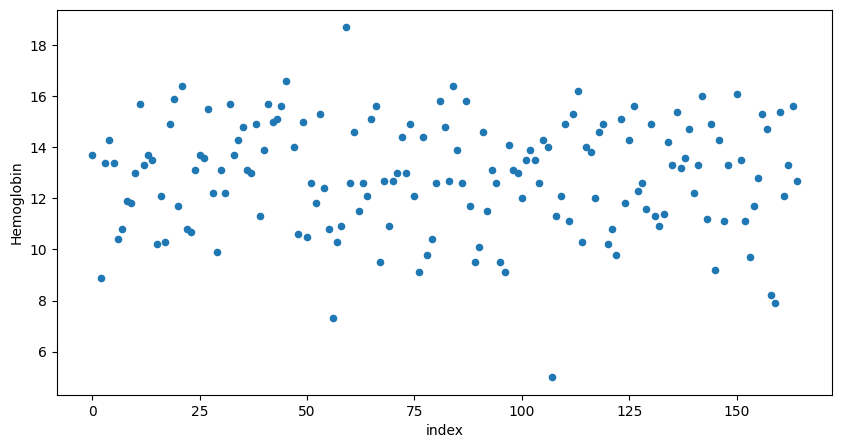

In [410]:
hcc_data.reset_index().plot(kind='scatter',y='Hemoglobin',x='index',figsize=(10,5))

In [411]:
hcc_data['Hemoglobin'].mean()

12.87901234567901

In [412]:
hcc_data[hcc_data['Hemoglobin']<10].shape

(15, 50)

In [413]:
hcc_data[hcc_data['Hemoglobin']>17.2].shape

(1, 50)

<Axes: xlabel='index', ylabel='MCV'>

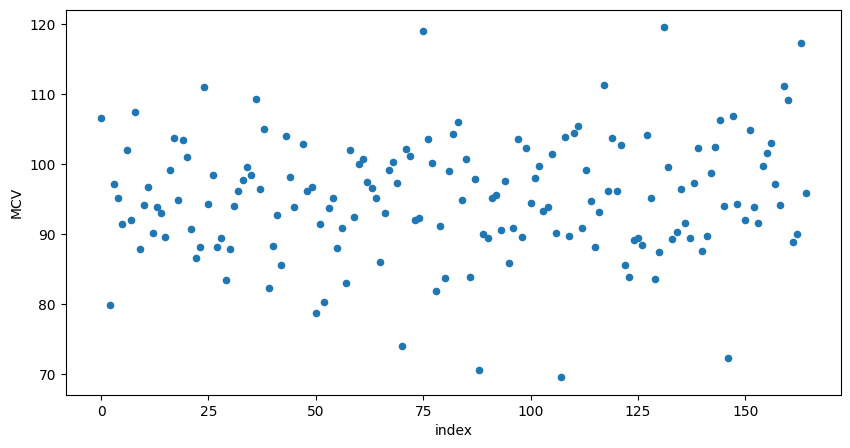

In [414]:
hcc_data.reset_index().plot(kind='scatter',y='MCV',x='index',figsize=(10,5))

In [415]:
hcc_data[hcc_data['MCV']>111].shape

(5, 50)

In [416]:
hcc_data[hcc_data['MCV']<71].shape

(2, 50)

<Axes: xlabel='index', ylabel='Leucocytes'>

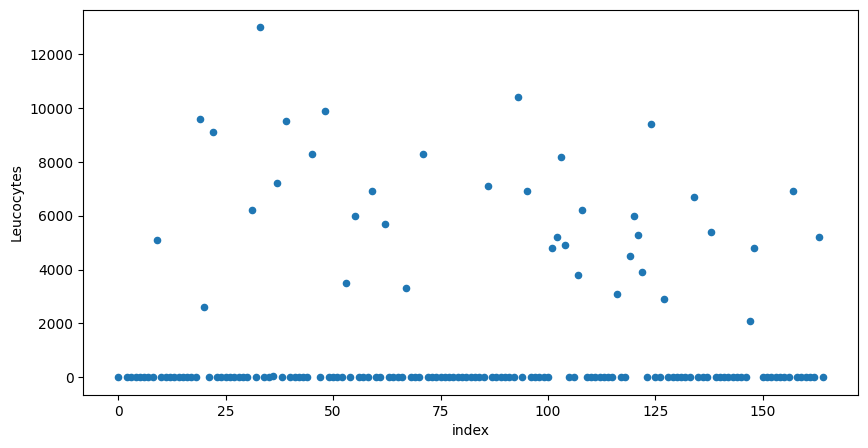

In [417]:
hcc_data.reset_index().plot(kind='scatter',y='Leucocytes',x='index',figsize=(10,5))

In [418]:
hcc_data[hcc_data['Leucocytes']>11000].shape

(1, 50)

In [419]:
hcc_data['Leucocytes'].describe()

count      162.000000
mean      1473.961549
std       2909.106006
min          2.200000
25%          5.100000
50%          7.200000
75%         19.525000
max      13000.000000
Name: Leucocytes, dtype: float64

In [420]:
hcc_data[hcc_data['Leucocytes']<200].shape

(124, 50)

<Axes: xlabel='index', ylabel='Platelets'>

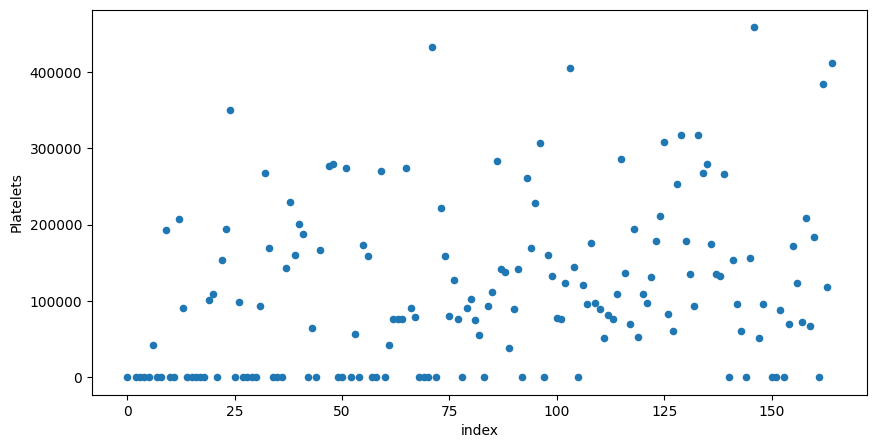

In [421]:
hcc_data.reset_index().plot(kind='scatter',y='Platelets',x='index',figsize=(10,5))

In [422]:
hcc_data['Platelets'].describe()

count       162.000000
mean     113206.442654
std      107118.632481
min           1.710000
25%         255.750000
50%       93000.000000
75%      171500.000000
max      459000.000000
Name: Platelets, dtype: float64

In [423]:
hcc_data[hcc_data['Platelets']<50000].shape

(50, 50)

<Axes: xlabel='index', ylabel=' Albumin'>

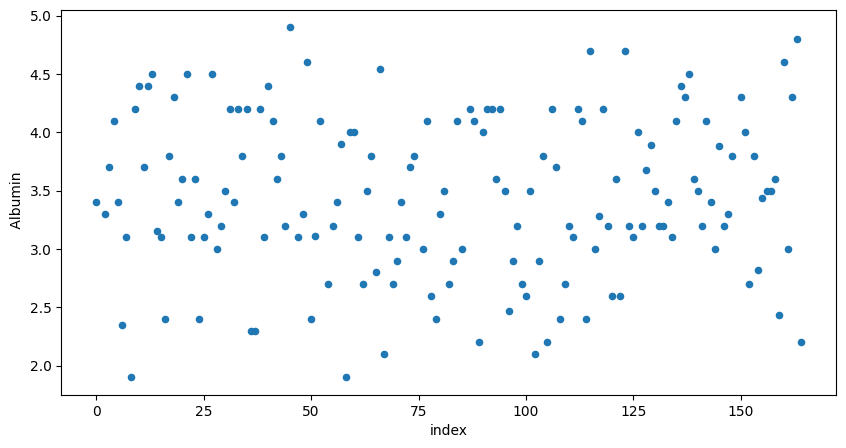

In [424]:
hcc_data.reset_index().plot(kind='scatter',y=' Albumin',x='index',figsize=(10,5))

In [425]:
hcc_data[hcc_data[' Albumin']<2.0].shape

(2, 50)

<Axes: xlabel='index', ylabel='Total_Bil'>

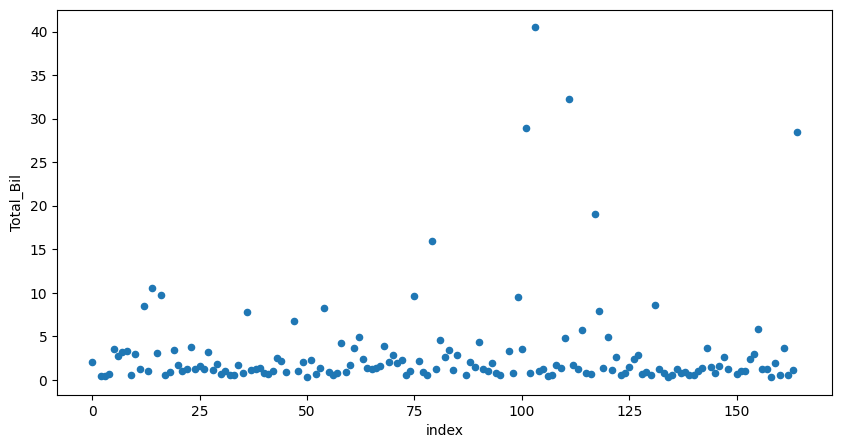

In [426]:
hcc_data.reset_index().plot(kind='scatter',y='Total_Bil',x='index',figsize=(10,5))

In [427]:
hcc_data[hcc_data['Total_Bil']>20].shape

(4, 50)

<Axes: xlabel='index', ylabel='ALT'>

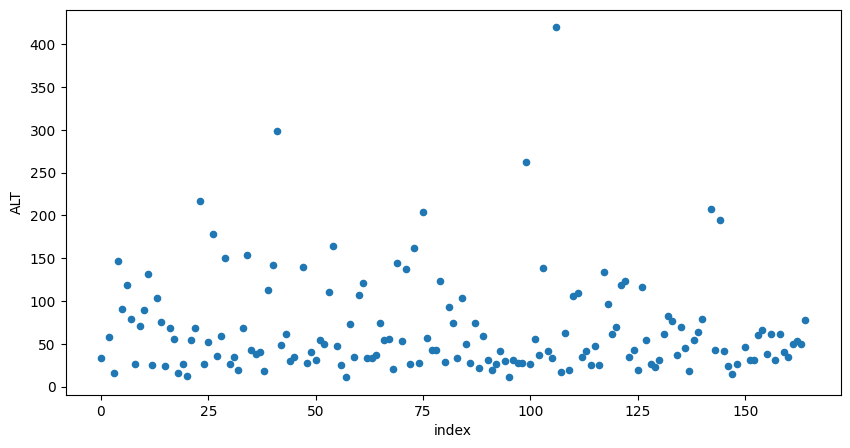

In [428]:
hcc_data.reset_index().plot(kind='scatter',y='ALT',x='index',figsize=(10,5))

In [429]:
hcc_data['ALT'].describe()

count    161.000000
mean      67.093168
std       57.539747
min       11.000000
25%       31.000000
50%       50.000000
75%       78.000000
max      420.000000
Name: ALT, dtype: float64

In [430]:
hcc_data[hcc_data['ALT']>300].shape

(1, 50)

<Axes: xlabel='index', ylabel='AST'>

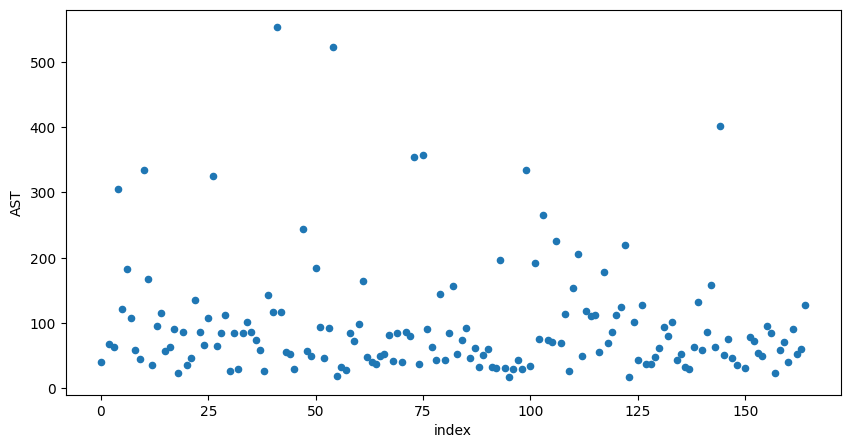

In [431]:
hcc_data.reset_index().plot(kind='scatter',y='AST',x='index',figsize=(10,5))

In [432]:
hcc_data['AST'].describe()

count    162.000000
mean      96.382716
std       87.484241
min       17.000000
25%       46.250000
50%       71.000000
75%      110.250000
max      553.000000
Name: AST, dtype: float64

In [433]:
hcc_data[hcc_data['AST']>400].shape

(3, 50)

In [434]:
hcc_data[hcc_data['AST']<25].shape

(5, 50)

<Axes: xlabel='index', ylabel='GGT'>

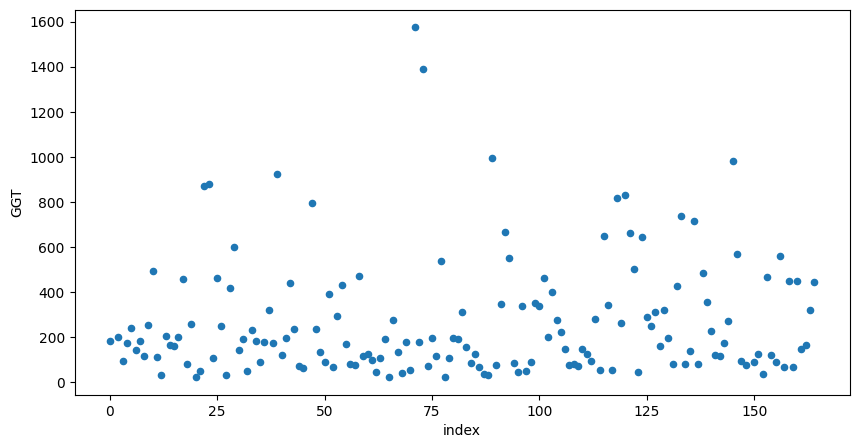

In [435]:
hcc_data.reset_index().plot(kind='scatter',y='GGT',x='index',figsize=(10,5))

In [436]:
hcc_data['GGT'].describe()

count     162.000000
mean      268.026543
std       258.750319
min        23.000000
25%        91.250000
50%       179.500000
75%       345.250000
max      1575.000000
Name: GGT, dtype: float64

In [437]:
hcc_data[hcc_data['GGT']>=1000].shape

(2, 50)

<Axes: xlabel='index', ylabel='ALP'>

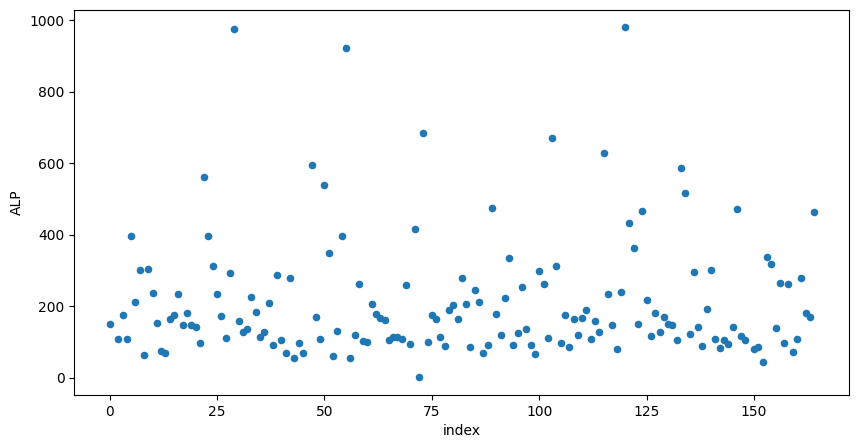

In [438]:
hcc_data.reset_index().plot(kind='scatter',y='ALP',x='index',figsize=(10,5))

In [439]:
hcc_data['ALP'].describe()

count    162.000000
mean     212.211605
std      167.943548
min        1.280000
25%      108.250000
50%      162.000000
75%      261.500000
max      980.000000
Name: ALP, dtype: float64

In [440]:
hcc_data[hcc_data['ALP']<30].shape

(1, 50)

In [441]:
hcc_data[hcc_data['ALP']>800].shape

(3, 50)

<Axes: xlabel='index', ylabel='Creatinine'>

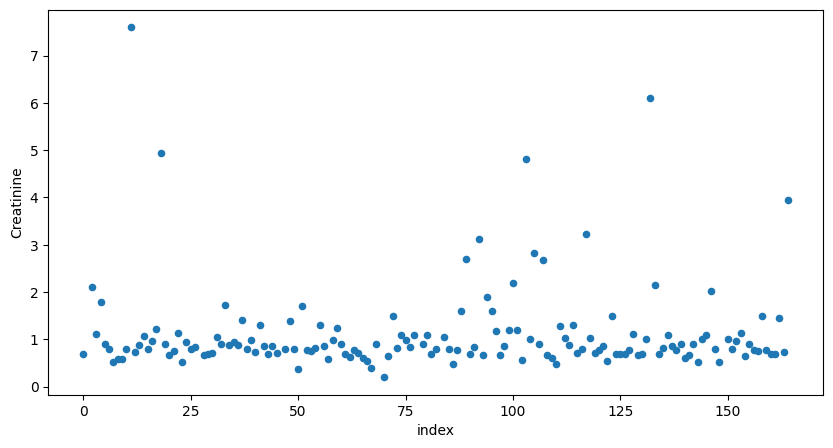

In [442]:
hcc_data.reset_index().plot(kind='scatter',y='Creatinine',x='index',figsize=(10,5))

In [443]:
hcc_data['Creatinine'].describe()

count    158.000000
mean       1.127089
std        0.955856
min        0.200000
25%        0.700000
50%        0.850000
75%        1.100000
max        7.600000
Name: Creatinine, dtype: float64

In [444]:
hcc_data[hcc_data['Creatinine']>4].shape

(4, 50)

<Axes: xlabel='index', ylabel='TP'>

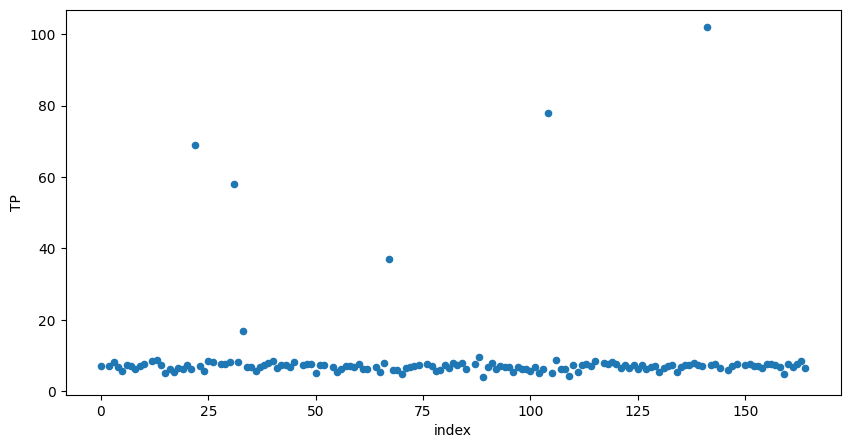

In [445]:
hcc_data.reset_index().plot(kind='scatter',y='TP',x='index',figsize=(10,5))

In [446]:
hcc_data['TP'].describe()

count    154.000000
mean       8.961039
std       11.728739
min        3.900000
25%        6.300000
50%        7.050000
75%        7.575000
max      102.000000
Name: TP, dtype: float64

In [447]:
hcc_data[hcc_data['TP']>11].shape

(6, 50)

<Axes: xlabel='index', ylabel='Major_Dim'>

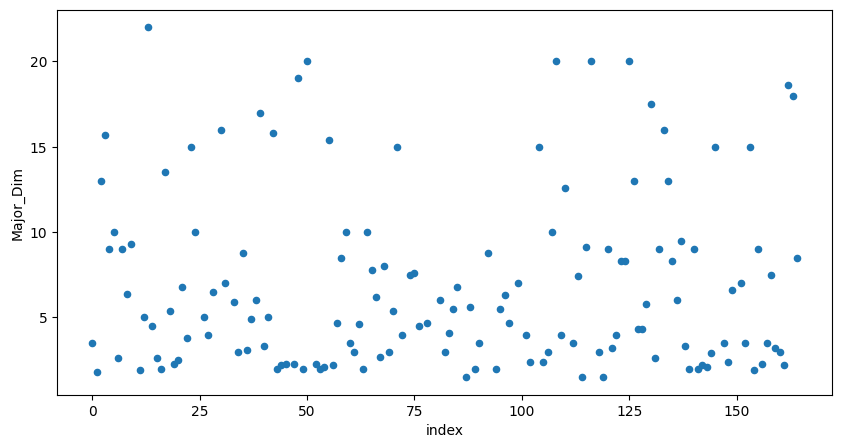

In [448]:
hcc_data.reset_index().plot(kind='scatter',y='Major_Dim',x='index',figsize=(10,5))

In [449]:
hcc_data[hcc_data['Major_Dim']>20].shape

(1, 50)

<Axes: xlabel='index', ylabel='Dir_Bil'>

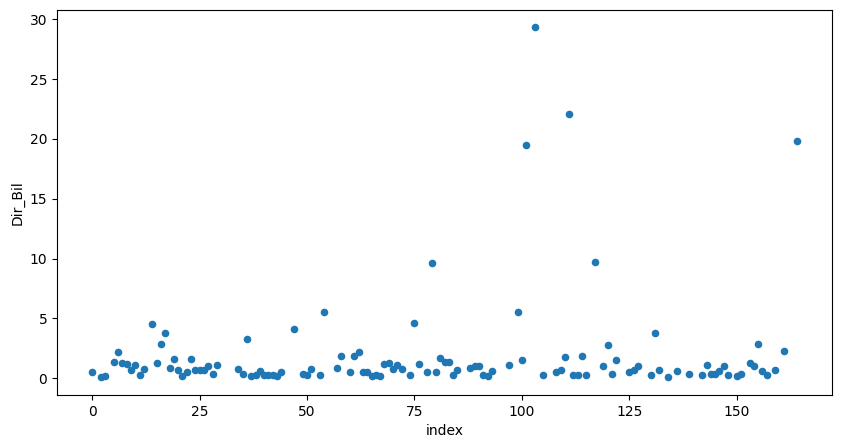

In [450]:
hcc_data.reset_index().plot(kind='scatter',y='Dir_Bil',x='index',figsize=(10,5))

In [451]:
hcc_data[hcc_data['Dir_Bil']>7].shape

(6, 50)

<Axes: xlabel='index', ylabel='Iron'>

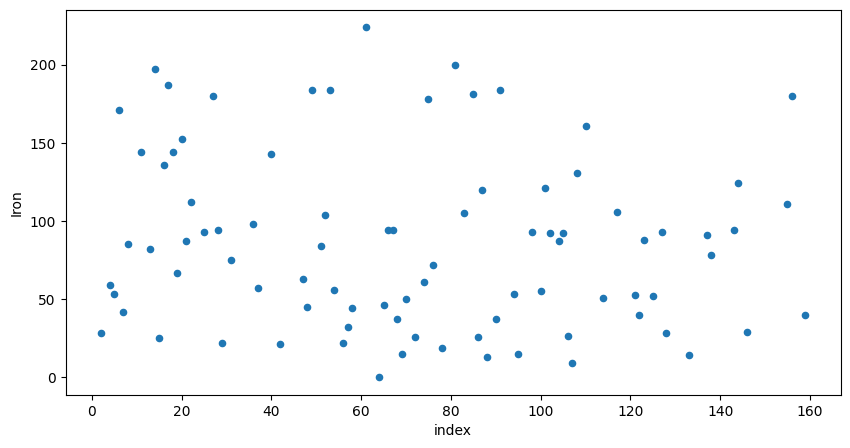

In [452]:
hcc_data.reset_index().plot(kind='scatter',y='Iron',x='index',figsize=(10,5))

In [453]:
hcc_data[hcc_data['Iron']<10].shape

(2, 50)

In [454]:
hcc_data[hcc_data['Iron']>200].shape

(1, 50)

<Axes: xlabel='index', ylabel='Sat'>

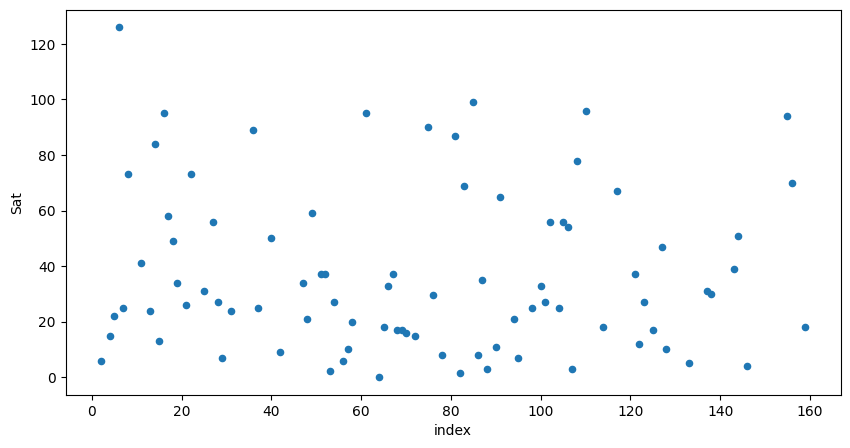

In [455]:
hcc_data.reset_index().plot(kind='scatter',y='Sat',x='index',figsize=(10,5))

In [456]:
hcc_data[hcc_data['Sat']>90].shape

(6, 50)

<Axes: xlabel='index', ylabel='Ferritin'>

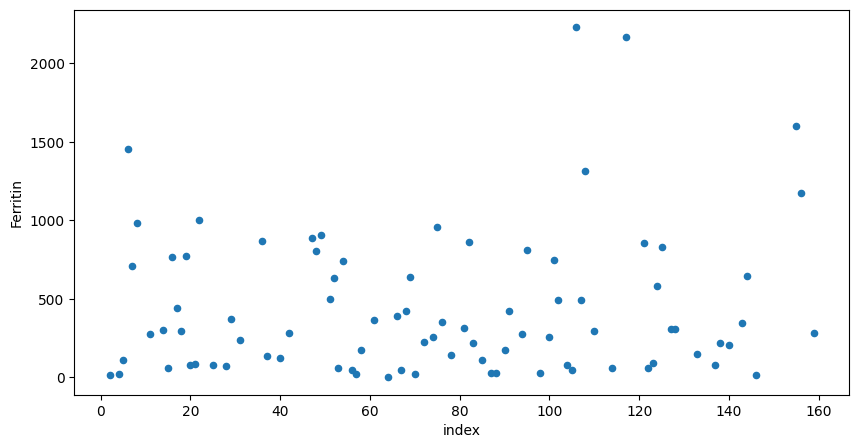

In [457]:
hcc_data.reset_index().plot(kind='scatter',y='Ferritin',x='index',figsize=(10,5))

In [458]:
hcc_data['Ferritin'].describe()

count      85.000000
mean      438.997647
std       457.114454
min         0.000000
25%        84.000000
50%       295.000000
75%       706.000000
max      2230.000000
Name: Ferritin, dtype: float64

In [459]:
hcc_data[hcc_data['Ferritin']>1000].shape

(7, 50)

### 3.Data cleaning  <a id='data_cleaning'></a>

[Back_to_top](#table_of_contents)

In [460]:
median_value = hcc_data[hcc_data['Grams_day'] <300]['Grams_day'].median()
hcc_data.loc[hcc_data['Grams_day'] >= 300, 'Grams_day'] = median_value

In [461]:
median_value = hcc_data[hcc_data['Packs_year'] < 100]['Packs_year'].median()
hcc_data.loc[hcc_data['Packs_year'] >= 100, 'Packs_year'] = median_value

In [462]:
median_value = hcc_data[hcc_data['INR'] < 2.5]['INR'].median()
hcc_data.loc[hcc_data['INR'] >= 2.5, 'INR'] = median_value

In [463]:
median_value = hcc_data[hcc_data['AFP'] < 125000]['AFP'].median()
hcc_data.loc[hcc_data['AFP'] >= 125000, 'AFP'] = median_value

<Axes: >

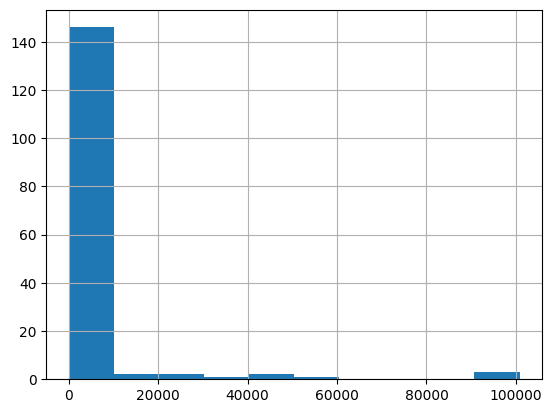

In [464]:
hcc_data['AFP'].hist()

In [465]:
median_value = hcc_data[hcc_data['Hemoglobin'] > 6]['Hemoglobin'].median()
hcc_data.loc[hcc_data['Hemoglobin'] <= 6, 'Hemoglobin'] = median_value

In [466]:
median_value = hcc_data[(hcc_data['MCV'] > 71) & (hcc_data['MCV'] < 111)]['MCV'].median()
hcc_data.loc[(hcc_data['MCV'] <= 71 )|(hcc_data['MCV'] >=111 ), 'MCV'] = median_value

In [467]:
median_value = hcc_data[hcc_data['Total_Bil'] < 20]['Total_Bil'].median()
hcc_data.loc[hcc_data['Total_Bil'] >= 20, 'Total_Bil'] = median_value

In [468]:
median_value = hcc_data[hcc_data['AST'] < 500]['AST'].median()
hcc_data.loc[hcc_data['AST'] >= 500, 'AST'] = median_value

In [469]:
median_value = hcc_data[hcc_data['GGT'] < 1000]['GGT'].median()
hcc_data.loc[hcc_data['GGT'] >= 1000, 'GGT'] = median_value

In [470]:
median_value = hcc_data[(hcc_data['ALP'] > 30) & (hcc_data['ALP'] < 800)]['ALP'].median()
hcc_data.loc[(hcc_data['ALP'] <= 30 )|(hcc_data['ALP'] >=800 ), 'ALP'] = median_value

In [471]:
median_value = hcc_data[hcc_data['Creatinine'] < 4]['Creatinine'].median()
hcc_data.loc[hcc_data['Creatinine'] >= 4, 'Creatinine'] = median_value

In [472]:
median_value = hcc_data[hcc_data['TP'] < 20]['TP'].median()
hcc_data.loc[hcc_data['TP'] >= 20, 'TP'] = median_value

In [473]:
median_value = hcc_data[hcc_data['Major_Dim'] < 20]['Major_Dim'].median()
hcc_data.loc[hcc_data['Major_Dim'] >= 20, 'Major_Dim'] = median_value

In [474]:
median_value = hcc_data[hcc_data['Dir_Bil'] < 18]['Dir_Bil'].median()
hcc_data.loc[hcc_data['Dir_Bil'] >= 18, 'Dir_Bil'] = median_value

In [475]:
median_value = hcc_data[(hcc_data['Iron'] > 10) & (hcc_data['Iron'] < 200)]['Iron'].median()
hcc_data.loc[(hcc_data['Iron'] <= 10 )|(hcc_data['Iron'] >=200 ), 'Iron'] = median_value

In [476]:
median_value = hcc_data[(hcc_data['Ferritin'] > 10) & (hcc_data['Ferritin'] < 1250)]['Ferritin'].median()
hcc_data.loc[(hcc_data['Ferritin'] <= 10 )|(hcc_data['Ferritin'] >=1250 ), 'Ferritin'] = median_value

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Grams_day'}>,
        <Axes: title={'center': 'Packs_year'}>,
        <Axes: title={'center': 'INR'}>, <Axes: title={'center': 'AFP'}>],
       [<Axes: title={'center': 'Hemoglobin'}>,
        <Axes: title={'center': 'MCV'}>,
        <Axes: title={'center': 'Leucocytes'}>,
        <Axes: title={'center': 'Platelets'}>,
        <Axes: title={'center': ' Albumin'}>],
       [<Axes: title={'center': 'Total_Bil'}>,
        <Axes: title={'center': 'ALT'}>, <Axes: title={'center': 'AST'}>,
        <Axes: title={'center': 'GGT'}>, <Axes: title={'center': 'ALP'}>],
       [<Axes: title={'center': 'TP'}>,
        <Axes: title={'center': 'Creatinine'}>,
        <Axes: title={'center': 'Nodules'}>,
        <Axes: title={'center': 'Major_Dim'}>,
        <Axes: title={'center': 'Dir_Bil'}>],
       [<Axes: title={'center': 'Iron'}>,
        <Axes: title={'center': 'Sat'}>,
        <Axes: title={'center': 'Ferritin'}>, <Axes: 

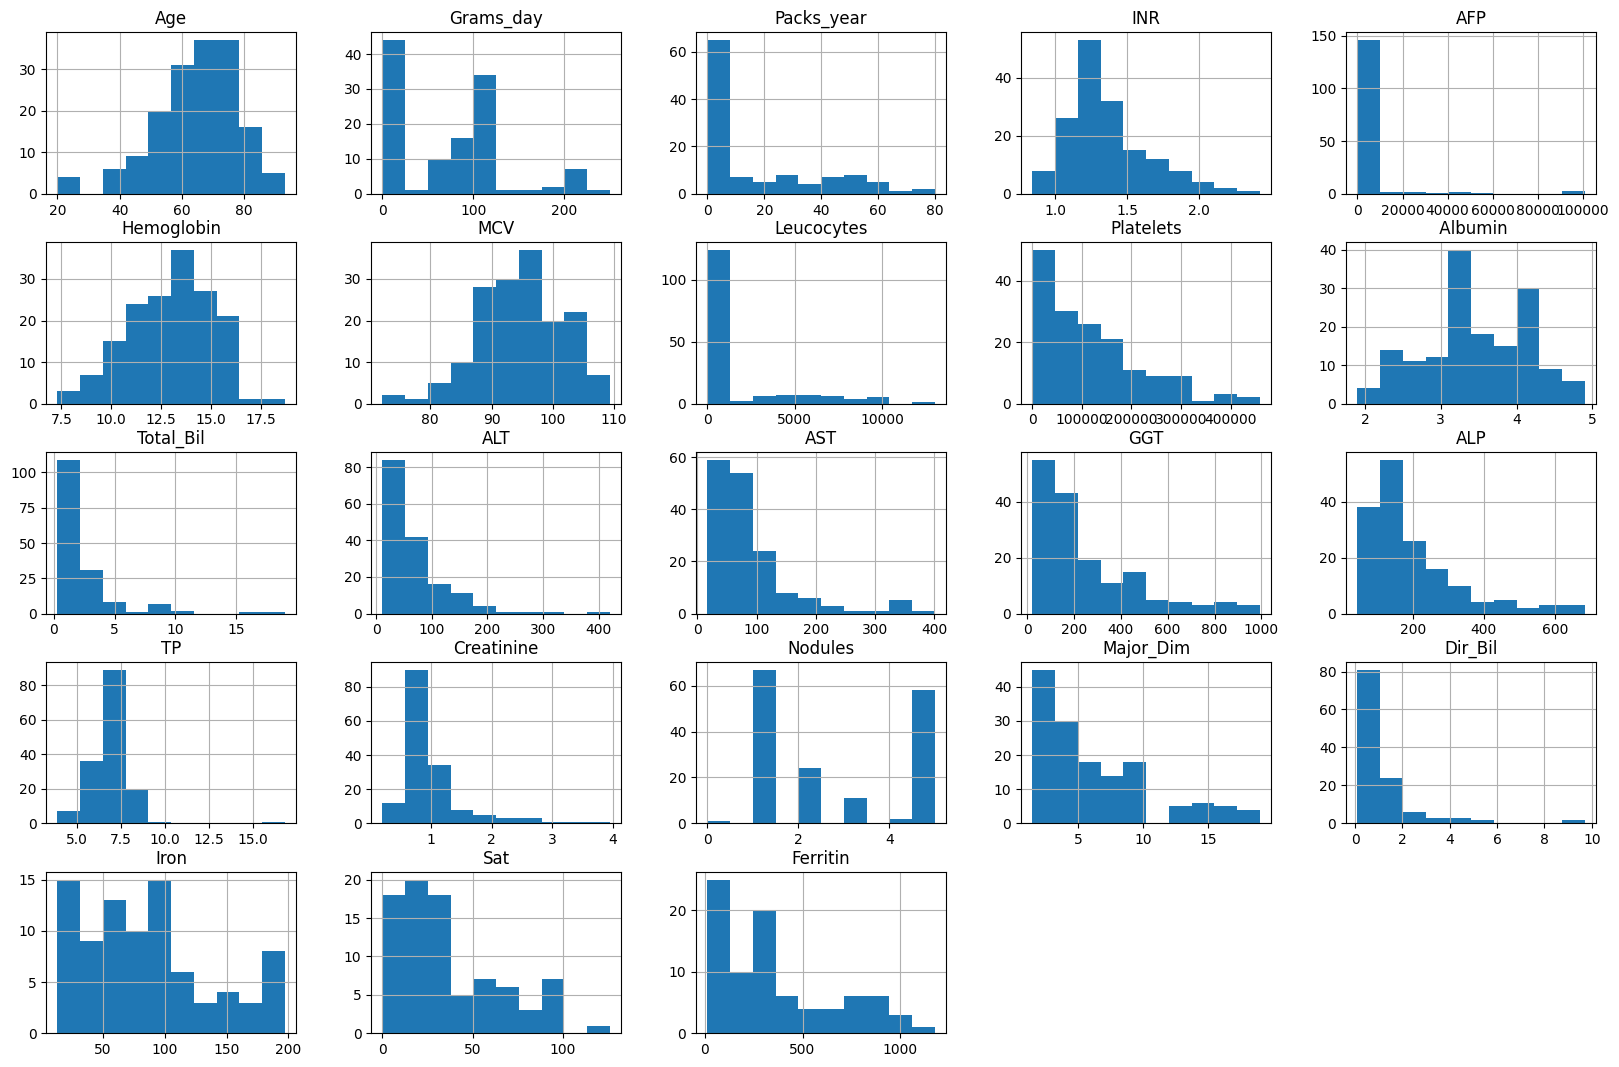

In [477]:
hcc_data.hist(figsize=(20,13))

In [478]:
hcc_data.replace('?', np.nan, inplace=True)

In [479]:
mask = ((hcc_data['Class'] == 'Lives') | (hcc_data['Class'] == 'Dies'))
hcc_data.loc[mask,'Encephalopathy'] = hcc_data.loc[mask,'Encephalopathy'].fillna('Not Applicable')
hcc_data.loc[mask,'Ascites'] = hcc_data.loc[mask,'Ascites'].fillna('Not Applicable')

In [480]:
hcc_data.isna().sum()

Gender             0
Symptoms          18
Alcohol            0
HBsAg             17
HBeAg             39
HBcAb             24
HCVAb              9
Cirrhosis          0
Endemic           39
Smoking           41
Diabetes           3
Obesity           10
Hemochro          23
AHT                3
CRI                2
HIV               14
NASH              22
Varices           52
Spleno            15
PHT               11
PVT                3
Metastasis         4
Hallmark           2
Age                0
Grams_day         48
Packs_year        53
PS                 0
Encephalopathy     0
Ascites            0
INR                4
AFP                8
Hemoglobin         3
MCV                3
Leucocytes         3
Platelets          3
 Albumin           6
Total_Bil          5
ALT                4
AST                3
GGT                3
ALP                3
TP                11
Creatinine         7
Nodules            2
Major_Dim         20
Dir_Bil           44
Iron              79
Sat          

In [481]:
def impute_missing_data(data):
    for column in data.columns:
        if data[column].dtype == 'object':  # Para dados categóricos
            # Preencher com a moda
            mode_value = data[column].mode()[0]
            data[column].fillna(mode_value,inplace=True)
        else:  # Para dados numéricos
            # Preencher com a mediana
            median_value = data[column].median()
            data[column].fillna(median_value,inplace=True)

# Aplicar a função ao dataset
impute_missing_data(hcc_data)


C:\Users\leono\AppData\Local\Temp\ipykernel_7056\992650362.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(mode_value,inplace=True)
C:\Users\leono\AppData\Local\Temp\ipykernel_7056\992650362.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, w

In [482]:
hcc_data.isna().sum()

Gender            0
Symptoms          0
Alcohol           0
HBsAg             0
HBeAg             0
HBcAb             0
HCVAb             0
Cirrhosis         0
Endemic           0
Smoking           0
Diabetes          0
Obesity           0
Hemochro          0
AHT               0
CRI               0
HIV               0
NASH              0
Varices           0
Spleno            0
PHT               0
PVT               0
Metastasis        0
Hallmark          0
Age               0
Grams_day         0
Packs_year        0
PS                0
Encephalopathy    0
Ascites           0
INR               0
AFP               0
Hemoglobin        0
MCV               0
Leucocytes        0
Platelets         0
 Albumin          0
Total_Bil         0
ALT               0
AST               0
GGT               0
ALP               0
TP                0
Creatinine        0
Nodules           0
Major_Dim         0
Dir_Bil           0
Iron              0
Sat               0
Ferritin          0
Class             0


### 4. Benchmark model <a id='Benchmark_model'></a>

[Back_to_top](#table_of_contents)

In [483]:
data_benchmark = hcc_data.copy()

In [484]:
data_benchmark['Class'].value_counts()

Class
Lives    102
Dies      63
Name: count, dtype: int64

In [485]:
# Remover espaços extras
data_benchmark['Class'] = data_benchmark['Class'].str.strip()

# Padronizar a capitalização
data_benchmark['Class'] = data_benchmark['Class'].str.title() 
# Verificar valores únicos antes do mapeamento
print("Valores únicos antes do mapeamento:", data_benchmark['Class'].unique())


Valores únicos antes do mapeamento: ['Lives' 'Dies']


In [486]:
# Aplicar o mapeamento
data_benchmark['Class'] = data_benchmark['Class'].map({'Dies': 0, 'Lives': 1})

# Verificar valores únicos após o mapeamento
print("Valores únicos após o mapeamento:", data_benchmark['Class'].unique())

Valores únicos após o mapeamento: [1 0]


#### 4.1 Train-tes split <a id='Train-test_split'></a>

In [584]:
from sklearn.model_selection import train_test_split

In [585]:
X = data_benchmark.drop(['Class'],axis=1)
y = data_benchmark['Class']

In [586]:
#onde-hote encode
X = pd.get_dummies(X)

In [587]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [588]:
# Padronizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [589]:
train_data = X_train.join(y_train)

AttributeError: 'numpy.ndarray' object has no attribute 'join'

In [492]:
train_data2 = train_data.copy()

#### 4.2 Fit a model to the data<a id='Fit_a_model_to_the_data'></a>

In [590]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
reg = LogisticRegression(max_iter=100)

reg.fit(X_train, y_train)

LogisticRegression()

#### 4.3 Model Evaluation <a id='Model_evaluation'></a>

In [591]:
X_test_a,y_test_a = train_data2.drop(['Class'],axis=1),train_data2['Class']

In [592]:
# Avaliar o modelo
train_accuracy = pipeline.score(X_train_a, y_train_a)
test_accuracy = pipeline.score(X_test_a, y_test_a)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 0.9166666666666666
Test Accuracy: 0.9166666666666666


In [593]:
from sklearn.metrics import confusion_matrix, classification_report

# Fazer previsões no conjunto de teste
y_test_pred = pipeline.predict(X_test_a)

# Calcular a matriz de confusão
conf_matrix = confusion_matrix(y_test_a, y_test_pred)
print("Confusion Matrix:\n", conf_matrix)

# Relatório de classificação
print("Classification Report:\n", classification_report(y_test_a, y_test_pred))

Confusion Matrix:
 [[44  8]
 [ 3 77]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.85      0.89        52
           1       0.91      0.96      0.93        80

    accuracy                           0.92       132
   macro avg       0.92      0.90      0.91       132
weighted avg       0.92      0.92      0.92       132



<Axes: >

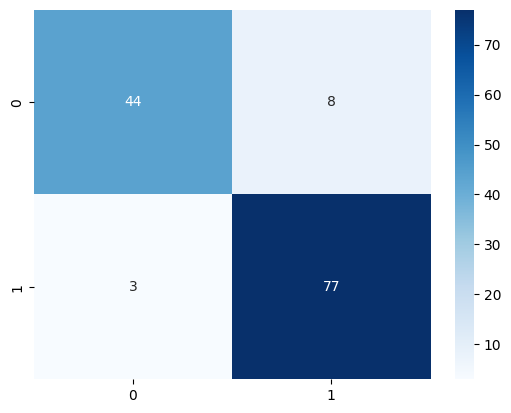

In [594]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')

### 5. Feature engineering <a id='Feature_engineering'></a>

[Back_to_top](#table_of_contents)

In [595]:
plt.figure(figsize=(60,50))
sns.heatmap(train_data.corr(),annot=True,cmap="YlGnBu")

<Axes: >

In [497]:
# Criação de razão entre ALT e AST
train_data['ALT_AST_Ratio'] = train_data['ALT'] / train_data['AST']

In [498]:
train_data['Bilirubin_Ratio'] = train_data['Dir_Bil'] / train_data['Total_Bil']

In [499]:
plt.figure(figsize=(60,50))
sns.heatmap(train_data.corr(),annot=True,cmap="YlGnBu")

<Axes: >

### 6. Model training <a id='Model_training'></a>

[Back_to_top](#table_of_contents)

#####    6.1. Decision tree <a id='Decision_tree'></a>

In [596]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [597]:
from sklearn.metrics import classification_report, accuracy_score


y_pred = tree.predict(X_test)
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.40      0.44      0.42         9
           1       0.78      0.75      0.77        24

    accuracy                           0.67        33
   macro avg       0.59      0.60      0.59        33
weighted avg       0.68      0.67      0.67        33

Accuracy: 0.6666666666666666


In [598]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

grid_search = GridSearchCV(DecisionTreeClassifier(),param_grid, cv=5)
grid_search.fit(X_train, y_train)
y_pred2 = grid_search.predict(X_test)

accuracy = accuracy_score(y_test,y_pred2)
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Accuracy on test set: {:.2f}".format(accuracy))

Best parameters: {'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 20}
Best cross-validation score: 0.66
Accuracy on test set: 0.70


[Text(0.51, 0.9444444444444444, 'x[14] <= -0.281\ngini = 0.483\nsamples = 132\nvalue = [54, 78]'),
 Text(0.28, 0.8333333333333334, 'x[5] <= 0.232\ngini = 0.327\nsamples = 68\nvalue = [14, 54]'),
 Text(0.2, 0.7222222222222222, 'x[9] <= 0.453\ngini = 0.467\nsamples = 35\nvalue = [13, 22]'),
 Text(0.16, 0.6111111111111112, 'x[8] <= 0.064\ngini = 0.497\nsamples = 24\nvalue = [13, 11]'),
 Text(0.12, 0.5, 'x[22] <= 0.425\ngini = 0.43\nsamples = 16\nvalue = [5, 11]'),
 Text(0.08, 0.3888888888888889, 'x[11] <= 0.076\ngini = 0.26\nsamples = 13\nvalue = [2, 11]'),
 Text(0.04, 0.2777777777777778, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]'),
 Text(0.12, 0.2777777777777778, 'x[59] <= 0.169\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.08, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.16, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.16, 0.3888888888888889, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples 

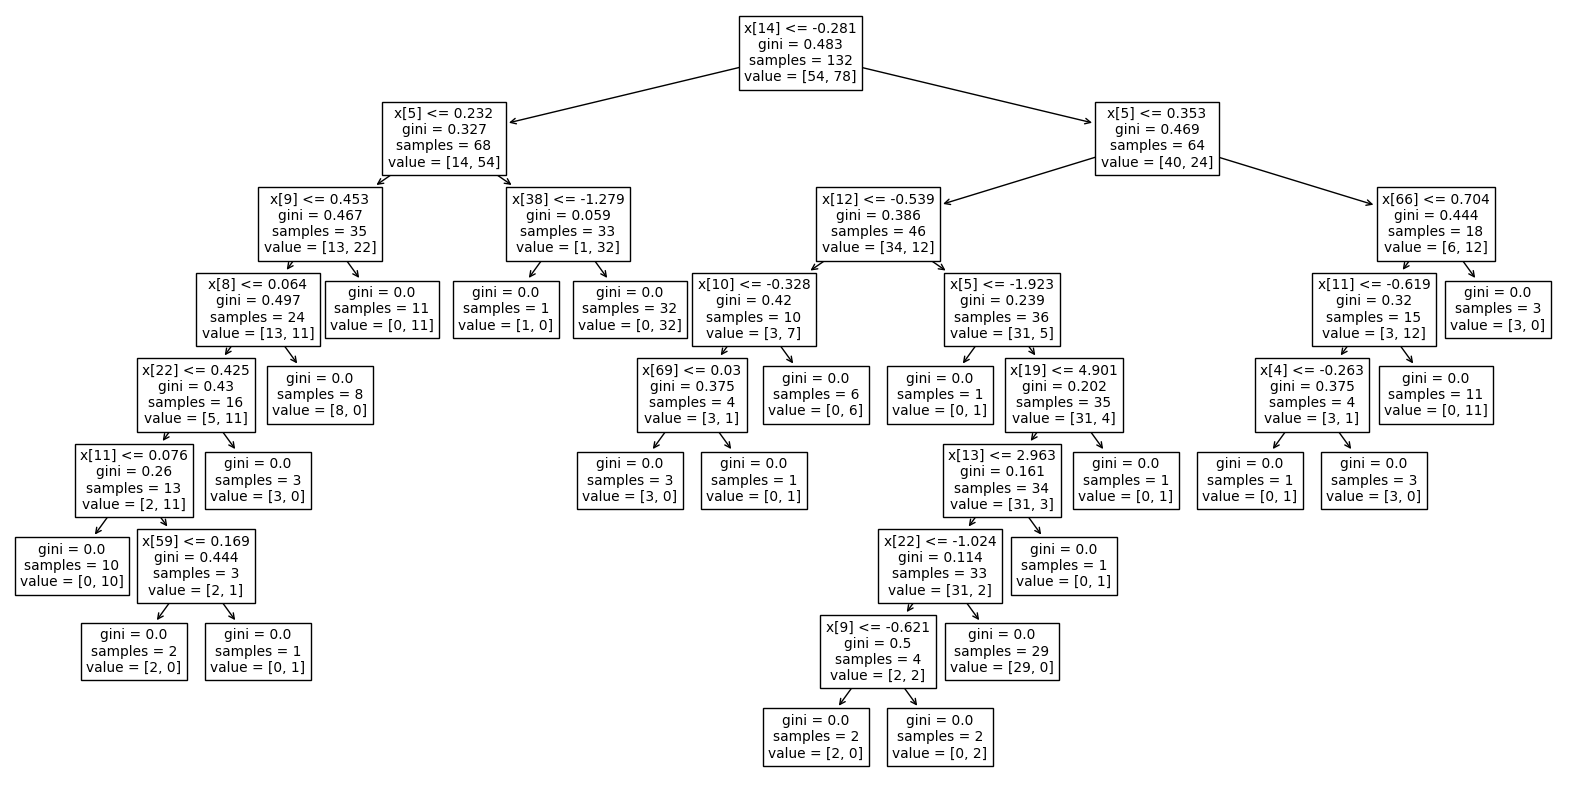

In [599]:
plt.figure(figsize=(20, 10))
plot_tree(tree)

##### Overfit

The model fits the training data´s pattern so much that it loses the ability to generalise

In [534]:
pd.DataFrame.from_dict(rmse_scores)

max_depth  rmse_train  rmse_test
0           2    0.435194   0.674200
1           5    0.174078   0.577350
2           8    0.000000   0.522233
3          10    0.000000   0.550482
4          15    0.000000   0.550482
5          20    0.000000   0.522233
6          30    0.000000   0.603023
7          50    0.000000   0.492366
8          70    0.000000   0.550482
9         100    0.000000   0.522233
10        150    0.000000   0.550482

##### 6.2. KNN   <a id='KNN'></a>

In [555]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [556]:
# Testar diferentes valores de n_neighbors
neighbors_range = range(1, 31)
cross_val_scores = []

for n_neighbors in neighbors_range:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    # Usar validação cruzada com 5 folds
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cross_val_scores.append(scores.mean())

# Encontrar o valor de n_neighbors com a melhor acurácia
best_n_neighbors = neighbors_range[np.argmax(cross_val_scores)]
print(f"Best n_neighbors: {best_n_neighbors}")

Best n_neighbors: 12


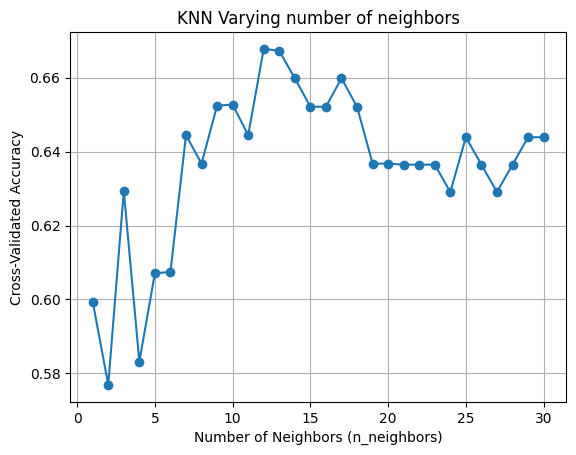

In [557]:
plt.plot(neighbors_range, cross_val_scores, marker='o')
plt.xlabel('Number of Neighbors (n_neighbors)')
plt.ylabel('Cross-Validated Accuracy')
plt.title('KNN Varying number of neighbors')
plt.grid(True)

In [572]:
scaler = StandardScaler()

In [573]:
X_train_scaled = scaler.fit_transform(X_train)

In [574]:
X_test_scaled = scaler.fit_transform(X_test)

In [575]:
knn = KNeighborsClassifier(n_neighbors=12)

In [576]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=12)

In [577]:
y_pred2 = knn.predict(X_test)

In [580]:
knn.score(X_test,y_test)

0.5757575757575758

##### 6.3. Comparing Algorithm performance <a id='Comparing_algorithm_performance'></a>

### 7. Tuning <a id='Tuning'></a>
[Back_to_top](#table_of_contents)